In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes


- Indicar el porcentaje de la información utilizando los 3 componentes principales
- Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

In [3]:
path = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/iris/iris.csv"
df = pd.read_csv(path)
df

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

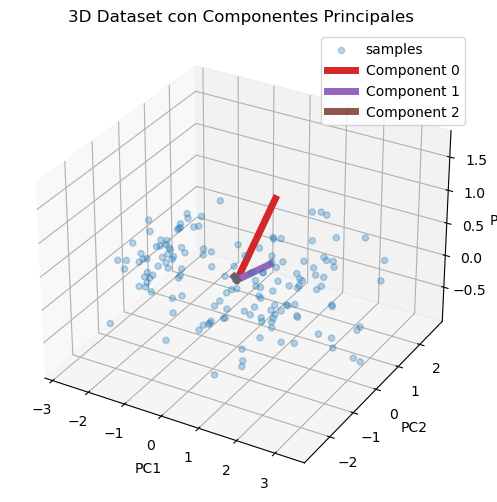

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

scaler = StandardScaler() # normalizar datos 
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  
    ax.plot(
        [0, comp[0]],
        [0, comp[1]],
        [0, comp[2]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 3}",
    )
ax.set_title("3D Dataset con Componentes Principales")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

In [7]:
X_std = (X - X.mean())/X.std(axis=0)
mean_vect = X_std.mean(axis=0)
mean_vect

cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)
np.cov(X_std.T)

eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

# Crear pares de valores y vectores propios
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:, i]) for i in range(len(eig_vals))]

eigen_pairs.sort(reverse=True)

eigen_pairs = eigen_pairs[:3]


total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


print("Varianza explicada por cada componente:")
for i, var in enumerate(var_exp):
    print(f"PC{i+1}: {var:.2f}%")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cum_var_exp):
    print(f"PC{i+1}: {cum_var:.2f}%")

La matriz de covarianzas es 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Varianza explicada por cada componente:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%

Varianza acumulada:
PC1: 72.96%
PC2: 95.81%
PC3: 99.48%
PC4: 100.00%


# Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

- Determinar el porcentaje de aporte de cada vector propio
- Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos
- Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados
- Hacer la comparsión de los pairplot con la data original y la data proyectada

In [13]:
path2 = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv"
df2 = pd.read_csv(path2)
df2
X = df2.iloc[:, 1:-1].dropna()
X

Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
0         0   6.535339   619.587845           24.891522  0.109059  4.276477   
1         0   8.749969   805.957634           28.389393  0.266538  3.718116   
2         1   7.341095  1143.808219           33.820234  0.001467  5.061750   
3         1   5.958145   959.711985           30.979219  0.001477  5.677977   
4         0   7.315231   729.540579           27.010009  0.146761  4.283221   
...     ...        ...          ...                 ...       ...       ...   
3757      0  21.234512  1208.850174           34.768523  0.063774  2.082079   
3758      0  20.435349  1227.151440           35.030721  0.066763  2.144625   
3759      0  18.011520  1151.582765           33.934978  0.068396  2.308349   
3760      0  13.330429   945.732779           30.752769  0.087872  2.732822   
3761      0   6.110138   480.884025           21.929068  0.118171  4.110669   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0     18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1     14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2     26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3     33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4     19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   
...         ...         ...       ...       ...          ...            ...   
3757   4.647310  158.437600  0.220666  0.048693     0.487131       5.211739   
3758   4.882034  161.158675  0.225931  0.051045     0.502712       5.083126   
3759   5.579498  167.130118  0.228930  0.052409     0.492269       5.103700   
3760   7.757570  223.812932  0.261527  0.068397     0.480064       6.439784   
3761  17.538826  239.251388  0.306224  0.093773     0.494333       6.787329   

      Correlation  
0        0.981939  
1        0.988834  
2        0.978014  
3        0.964189  
4        0.972789  
...           ...  
3757     0.950972  
3758     0.952749  
3759     0.952181  
3760     0.940898  
3761     0.938731  

[3762 rows x 13 columns]

Quitamos la columna de coarness porque no aporta info relevante, son puros ceros por lo que no hay variabilidad en los datos 

### Determinar el porcentaje de aporte de cada vector propio


In [14]:

X_std = (X - X.mean())/X.std(axis=0)
mean_vect = X_std.mean(axis=0)
mean_vect


cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)
np.cov(X_std.T)

(X - np.mean(X, axis=0)).T.dot((X - np.mean(X, axis=0)))/(X_std.shape[0]-1)
np.cov(X.T)

eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)                                                         
 
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)

total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

La matriz de covarianzas es 
                       Class      Mean  Variance  Standard Deviation  \
Class               1.000000 -0.095729  0.308818            0.285568   
Mean               -0.095729  1.000000  0.783027            0.790984   
Variance            0.308818  0.783027  1.000000            0.975699   
Standard Deviation  0.285568  0.790984  0.975699            1.000000   
Entropy            -0.778180 -0.099729 -0.344432           -0.345127   
Skewness            0.402644 -0.601593 -0.347399           -0.425428   
Kurtosis            0.239844 -0.358163 -0.248312           -0.329798   
Contrast            0.212643 -0.050974  0.135494            0.117981   
Energy             -0.862413 -0.014863 -0.335470           -0.331103   
ASM                -0.758255 -0.109393 -0.341061           -0.342530   
Homogeneity        -0.847529  0.095556 -0.290527           -0.288801   
Dissimilarity       0.556319 -0.113864  0.235487            0.224773   
Correlation        -0.108601  0.293

array([ 43.27635709,  72.18463634,  84.40479419,  90.2038127 ,
        94.86792751,  96.94545371,  98.52136016,  99.3298794 ,
        99.58872453,  99.80782485,  99.9210929 ,  99.99958159,
       100.        ])

### Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos


In [15]:
num_components = np.argmax(cum_var_exp >= 90) + 1
num_components
print(f'Se necesitan {num_components} componentes principales para explicar al menos el 90% de la varianza.')
first_4_components = np.cumsum(var_exp[:4])
first_4_components

Se necesitan 4 componentes principales para explicar al menos el 90% de la varianza.


array([43.27635709, 72.18463634, 84.40479419, 90.2038127 ])

### Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados


In [16]:
T_matrix = np.stack([eigen_pairs[i][1] for i in range(4)], axis=1)
T_matrix

espacio_proyectado = []

for idx in range(len(X_std)):
    vec = X_std.iloc[idx, :] # vector en R4
    Tvec = T_matrix.T.dot(vec) # proyección del espacio de 4D a 2D
    espacio_proyectado.append(Tvec)
    
espacio_proyectado_np = np.array(espacio_proyectado)
espacio_proyectado_np.shape
df_proyectado = pd.DataFrame({'CP1': espacio_proyectado_np[:, 0], 
                              'CP2': espacio_proyectado_np[:, 1], 
                              'CP3': espacio_proyectado_np[:, 2],
                              'CP4': espacio_proyectado_np[:, 3],})
df_proyectado

CP1       CP2       CP3       CP4
0    -1.376663  0.097717 -0.094978 -0.317347
1    -4.306775 -0.162865  1.198892  0.140446
2     2.773775 -1.058237 -0.917561 -0.148421
3     3.290235 -0.162785 -0.310197 -0.702588
4    -1.195680  0.302812  1.358942 -0.871392
...        ...       ...       ...       ...
3757 -0.025127 -2.128035  1.443447  0.652348
3758 -0.131731 -2.101991  1.440976  0.622424
3759 -0.136638 -1.746912  1.307689  0.402689
3760 -0.104890 -0.624156  1.750573 -0.366528
3761 -0.675234  1.223402  1.408333 -1.065782

[3762 rows x 4 columns]

In [17]:
eigen_pairs[0][1], eigen_pairs[1][1]
T_matrix = np.stack([eigen_pairs[i][1] for i in range(4)], axis=1)
T_matrix
Y = X_std.dot(T_matrix)
Y

0         1         2         3
0    -1.376663  0.097717 -0.094978 -0.317347
1    -4.306775 -0.162865  1.198892  0.140446
2     2.773775 -1.058237 -0.917561 -0.148421
3     3.290235 -0.162785 -0.310197 -0.702588
4    -1.195680  0.302812  1.358942 -0.871392
...        ...       ...       ...       ...
3757 -0.025127 -2.128035  1.443447  0.652348
3758 -0.131731 -2.101991  1.440976  0.622424
3759 -0.136638 -1.746912  1.307689  0.402689
3760 -0.104890 -0.624156  1.750573 -0.366528
3761 -0.675234  1.223402  1.408333 -1.065782

[3762 rows x 4 columns]

In [19]:
# ver si las matrices son equivalentes 
print("¿Las proyecciones son iguales?", np.allclose(Y, espacio_proyectado_np))

# si no son idénticas, mostrar la diferencia promedio
if not np.allclose(Y, espacio_proyectado_np):
    diff = np.abs(Y - espacio_proyectado_np)
    print("Diferencia promedio entre métodos:", np.mean(diff))

¿Las proyecciones son iguales? True


### Hacer la comparsión de los pairplot con la data original y la data proyectada

<Figure size 500x500 with 0 Axes>

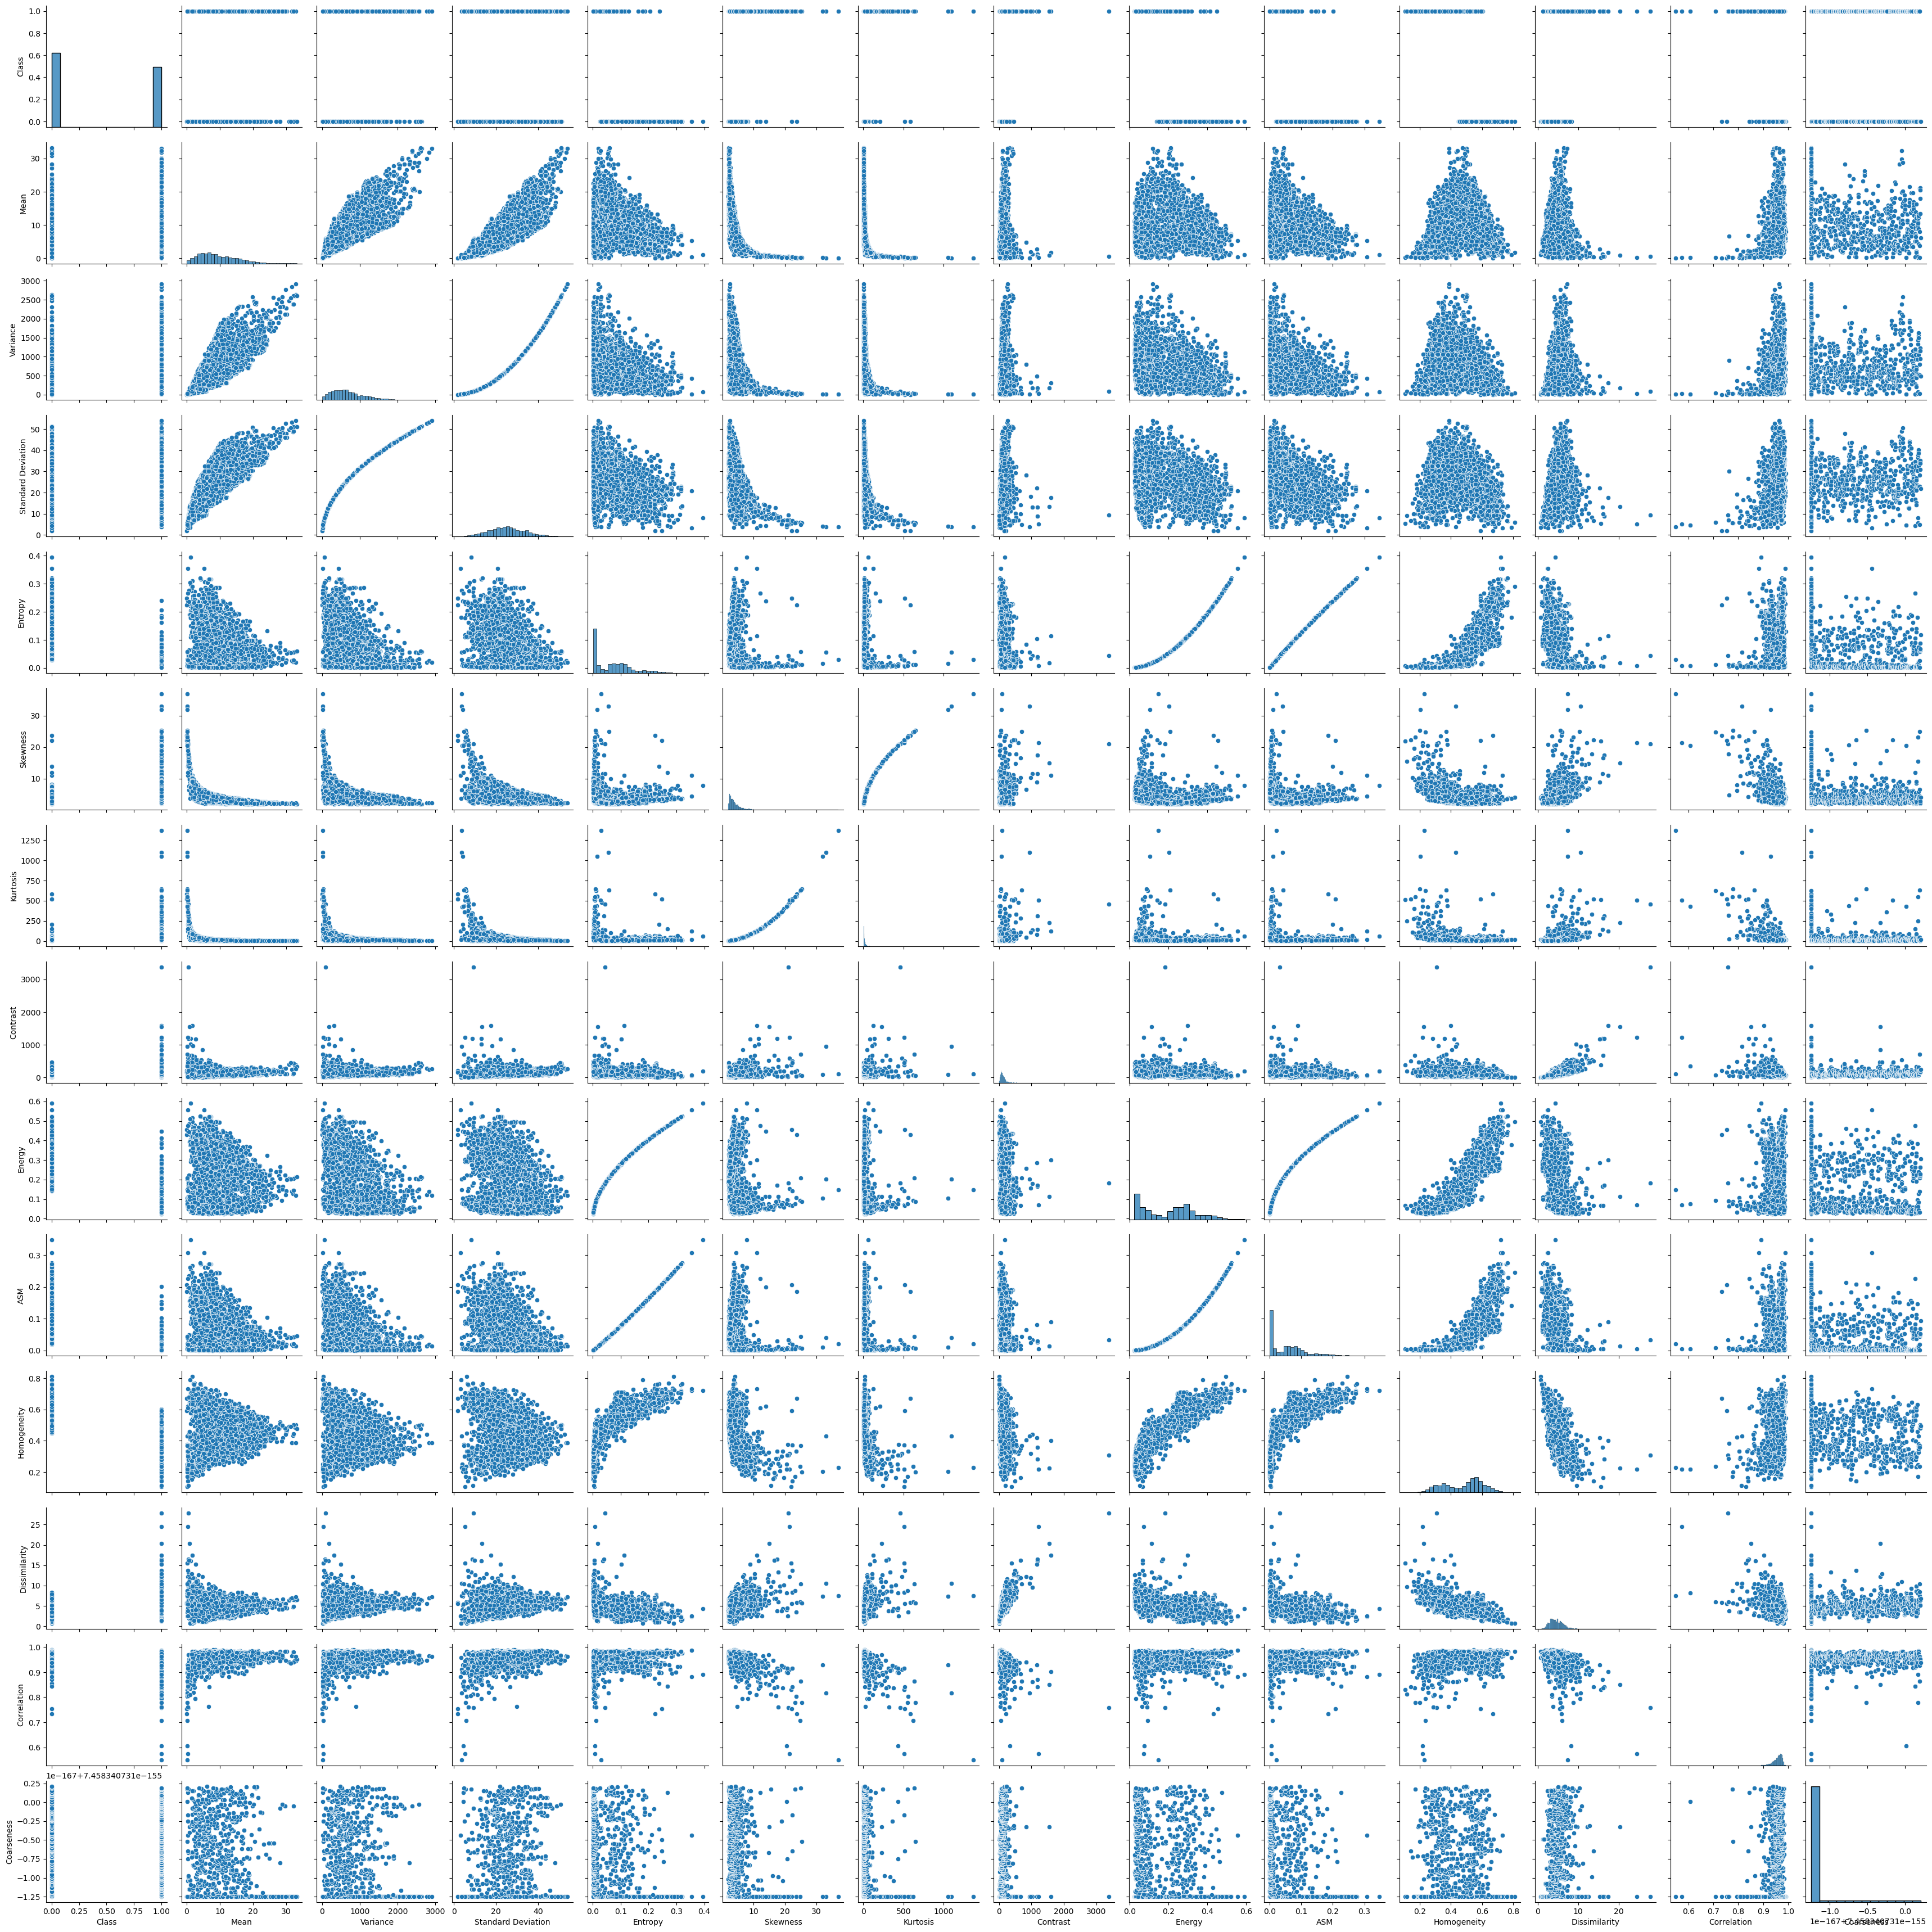

In [ ]:
plt.figure(figsize=(5, 5))
sns.pairplot(df2)

<Figure size 500x500 with 0 Axes>

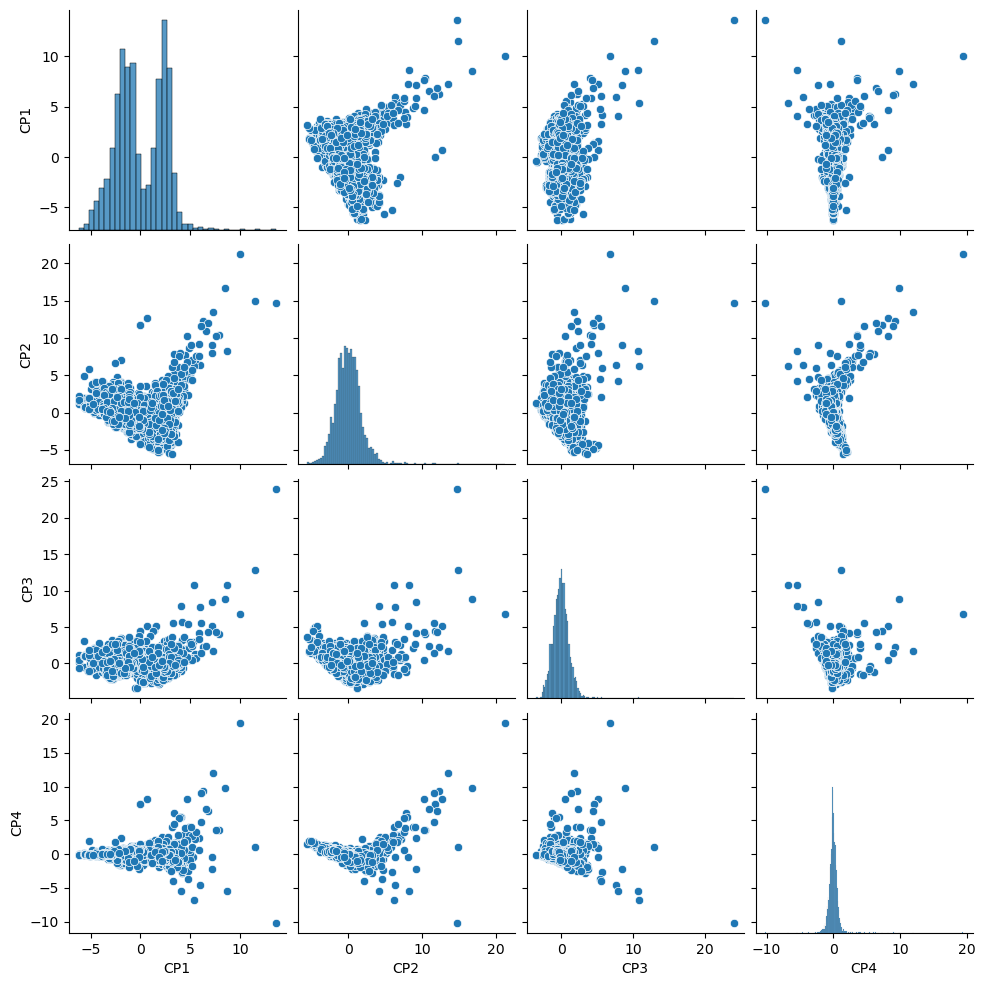

In [22]:
plt.figure(figsize=(5, 5))
sns.pairplot(df_proyectado)

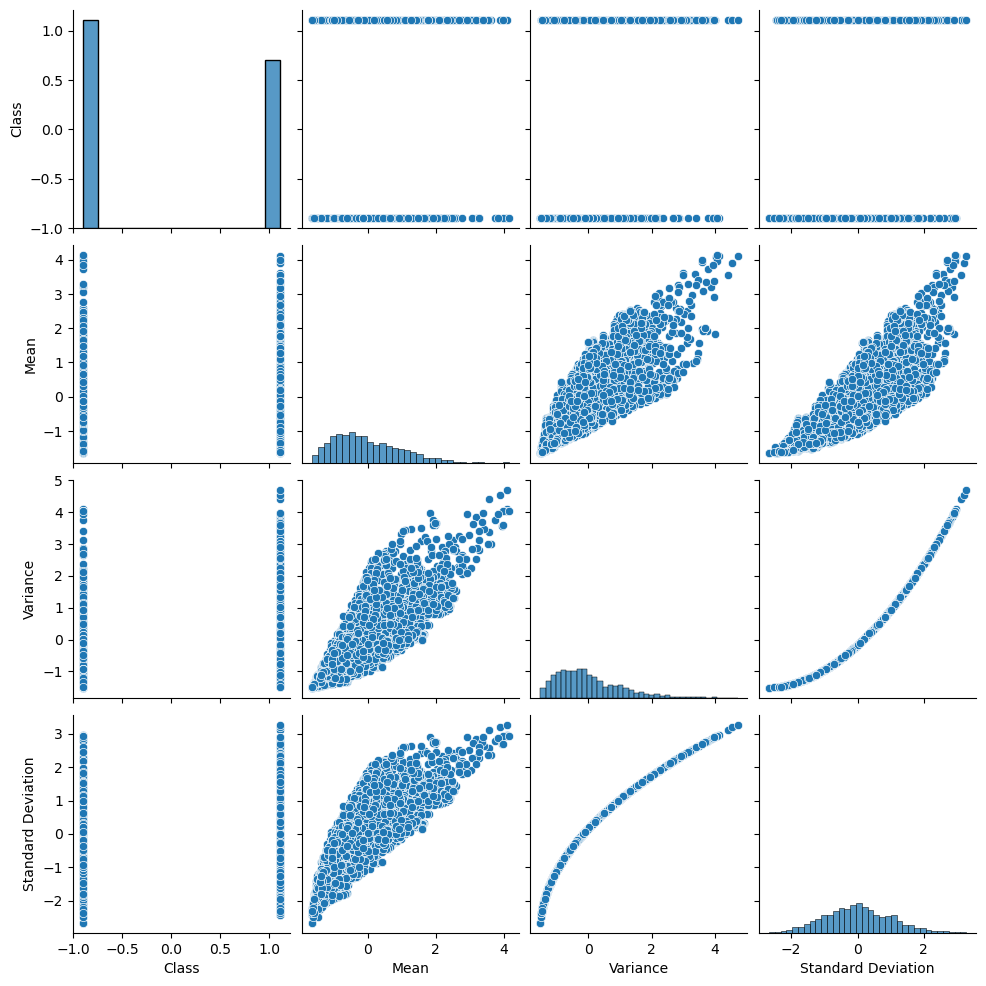

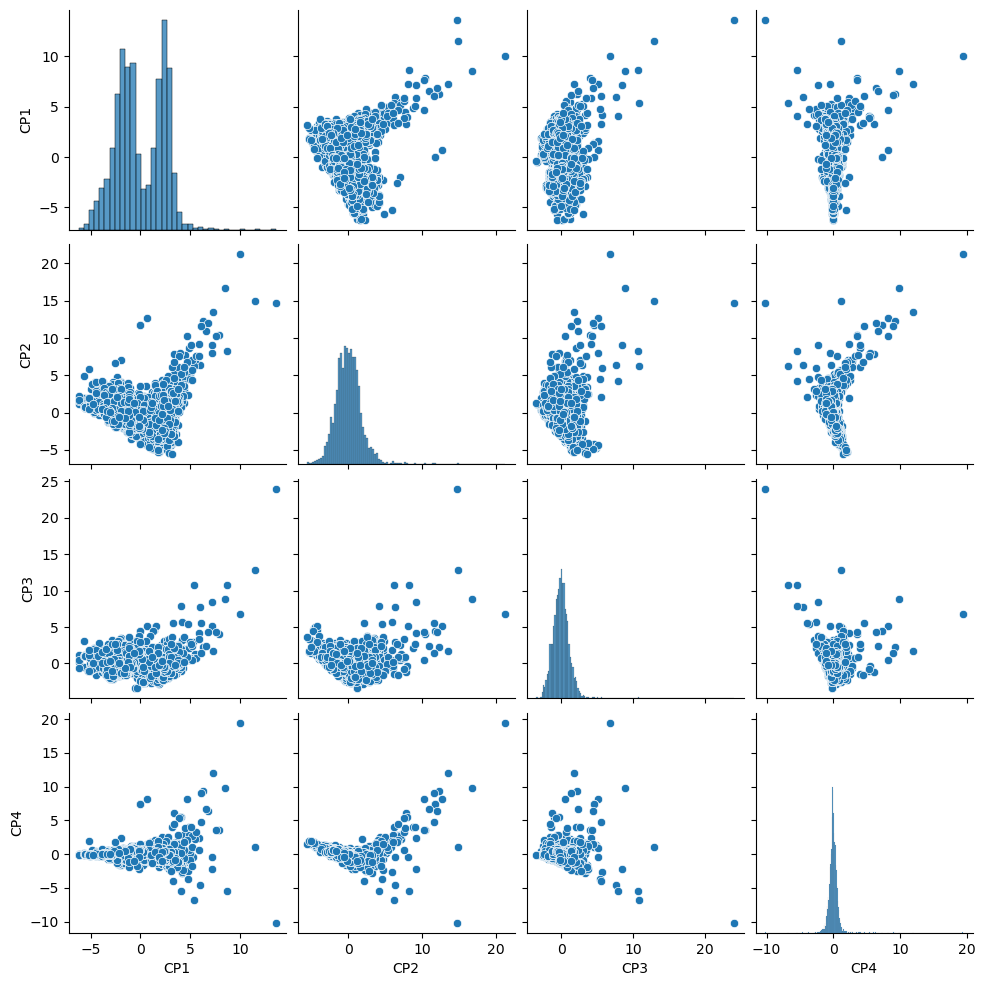

CP1 y CP2 tienen una relación no completamente lineal, lo que sugiere que CP2 aún captura información relevante que no está en CP1
CP1 y CP2 tienen valores más dispersos, lo que indica que explican más varianza que CP3 y CP4


In [28]:
df_original = X_std.iloc[:, :4]
sns.pairplot(df_original)
plt.show()
sns.pairplot(df_proyectado)
plt.show()

print("CP1 y CP2 tienen una relación no completamente lineal, lo que sugiere que CP2 aún captura información relevante que no está en CP1")
print("CP1 y CP2 tienen valores más dispersos, lo que indica que explican más varianza que CP3 y CP4")